<a href="https://colab.research.google.com/github/MohamedddWael/Fashion_Mnist_ANN/blob/main/7462_Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization,Activation, Flatten
from tensorflow.keras.callbacks import LearningRateScheduler

**Loading the Fashion Mnist Dataset**

In [191]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

**Image Visualization**

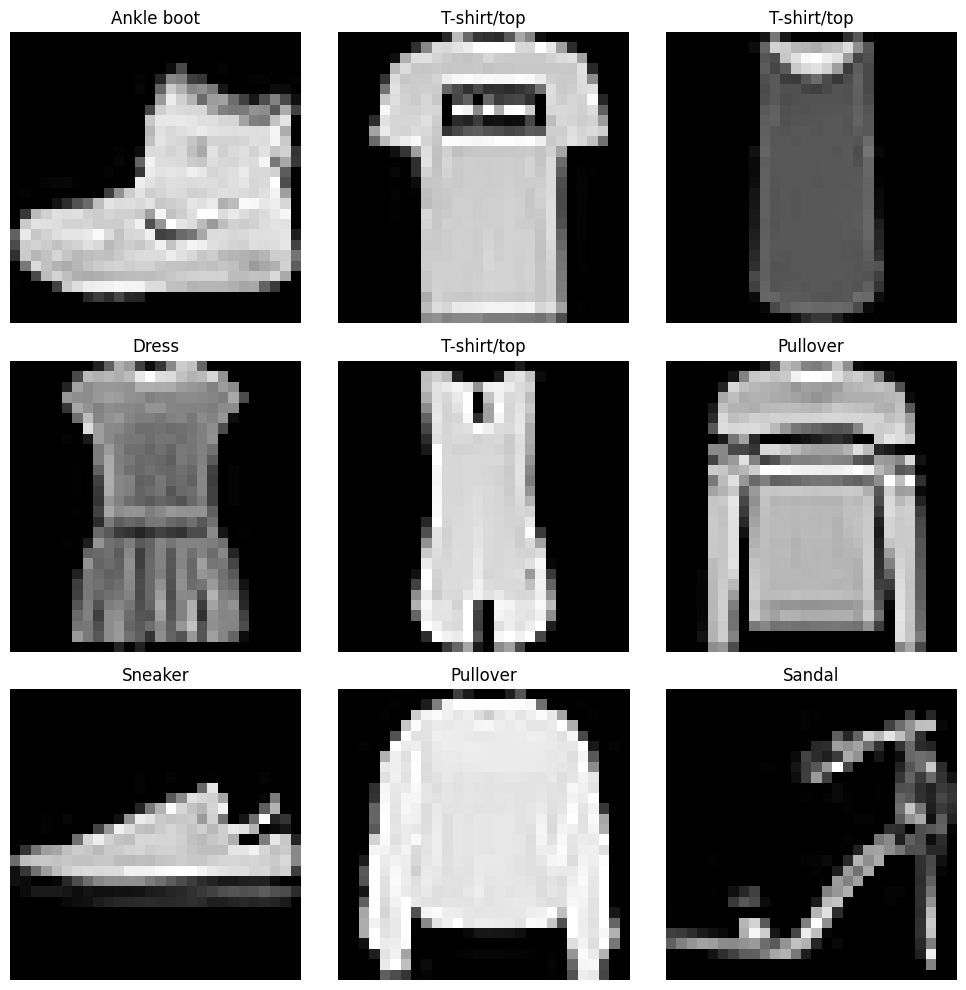

In [192]:
def visualize_images(images, labels, class_names, num_images= 9):
    plt.figure(figsize= (10,10))
    for i in range(num_images):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i], cmap = 'gray')
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

visualize_images(x_train[0:10, :, :], y_train[0:10], class_names)

**Normalization of the images**

In [193]:
x_train = x_train / 255.0
x_test = x_test / 255.0

**Flattening Images**


In [194]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


**Apply data augmentation techniques**

In [195]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [196]:
#y_train = to_categorical(y_train, 10)
#y_test = to_categorical(y_test, 10)
#print(y_train.shape)
#print(y_test.shape)

**Model Architecture**

In [201]:
model = Sequential()
model.add(Dense(1024, input_shape=(784,)))
model.add(Dropout(0.2))  # First hidden layer
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Dense(512))
model.add(Dropout(0.2))  # First hidden layer
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(256))
model.add(Dropout(0.2))  # First hidden layer
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(128))  # Second hidden layer
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(64))  # Third hidden layer
#model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(32))  # Fourth hidden layer
#model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(16))  # Fifth hidden layer
#model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax'))  # Output layer

model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_114 (Dense)                    │ (None, 1024)                │         803,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_56               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_77 (Activation)           │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_57               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_78 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_116 (Dense)                    │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_58               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_79 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_117 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_59               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_80 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_60               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_81 (Activation)           │ (None, 64)                  │              

 Total params: 1,512,026 (5.77 MB)

 Trainable params: 1,507,962 (5.75 MB)

 Non-trainable params: 4,064 (15.88 KB)

In [202]:
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

def scheduler(epoch, lr):
    if epoch > 50:
        return lr * 0.8
    return lr

lr_scheduler = LearningRateScheduler(scheduler)

In [ ]:
history = model.fit(x_train, y_train, epochs= 50, batch_size= 64, validation_split= 0.2)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 35s 39ms/step - accuracy: 0.6644 - loss: 1.0953 - val_accuracy: 0.8406 - val_loss: 0.4552
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.8349 - loss: 0.4747 - val_accuracy: 0.7860 - val_loss: 0.5307
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.8486 - loss: 0.4229 - val_accuracy: 0.8600 - val_loss: 0.3743
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.8618 - loss: 0.3866 - val_accuracy: 0.8606 - val_loss: 0.3825
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.8689 - loss: 0.3672 - val_accuracy: 0.8352 - val_loss: 0.4600
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.8732 - loss: 0.3506 - val_accuracy: 0.8737 - val_loss: 0.3547
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.8825 - loss: 0.3261 - val_accuracy: 0.8758 - val_loss: 0.3549
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.8836 - loss: 0.3222 - 

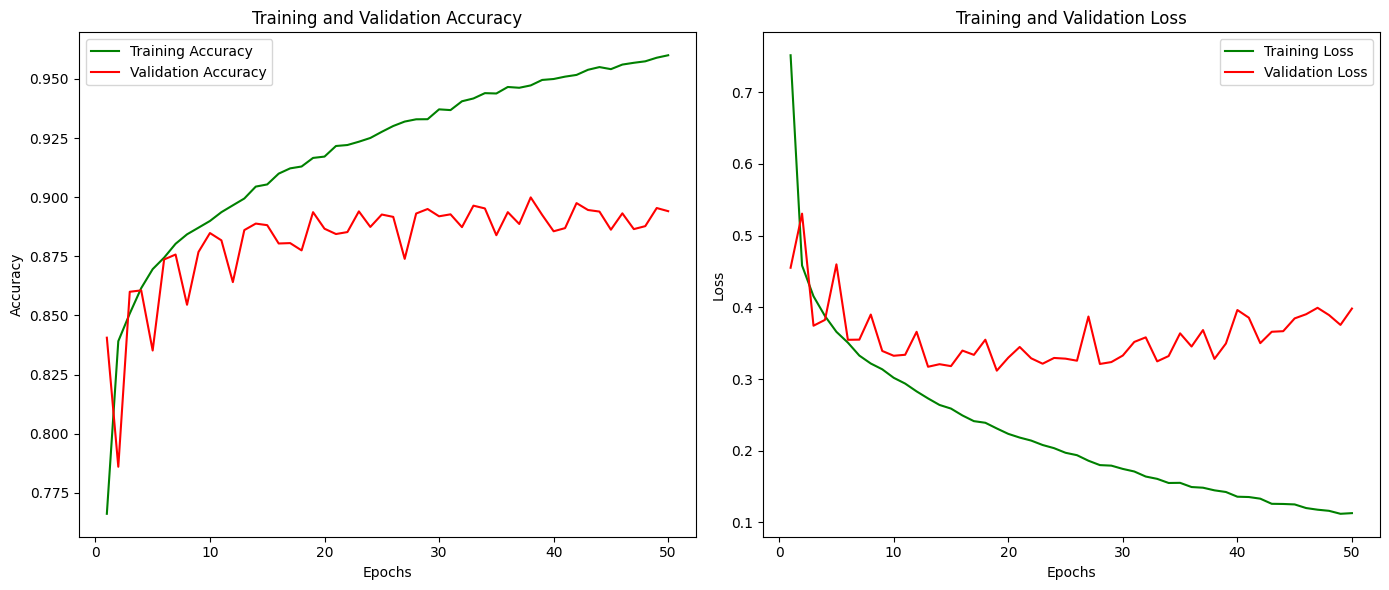

In [204]:
def plot_accuracy_loss(history):
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(accuracy) + 1)

  plt.figure(figsize= (14,6))
  plt.subplot(1,2,1)
  plt.plot(epochs, accuracy, color= 'green', label= 'Training Accuracy')
  plt.plot(epochs, val_accuracy, color= 'red', label= 'Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, loss, color= 'green', label= 'Training Loss')
  plt.plot(epochs, val_loss, color= 'red', label= 'Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.tight_layout()
  plt.show()

plot_accuracy_loss(history)


In [205]:
accuracy = model.evaluate(x_test, y_test)[1]

print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8878 - loss: 0.4270
Accuracy: 0.8883000016212463


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


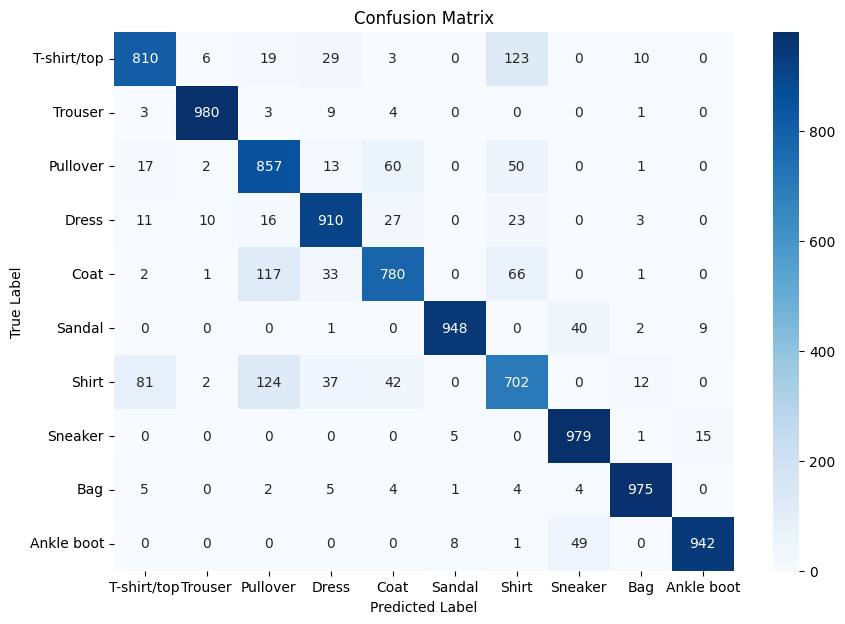

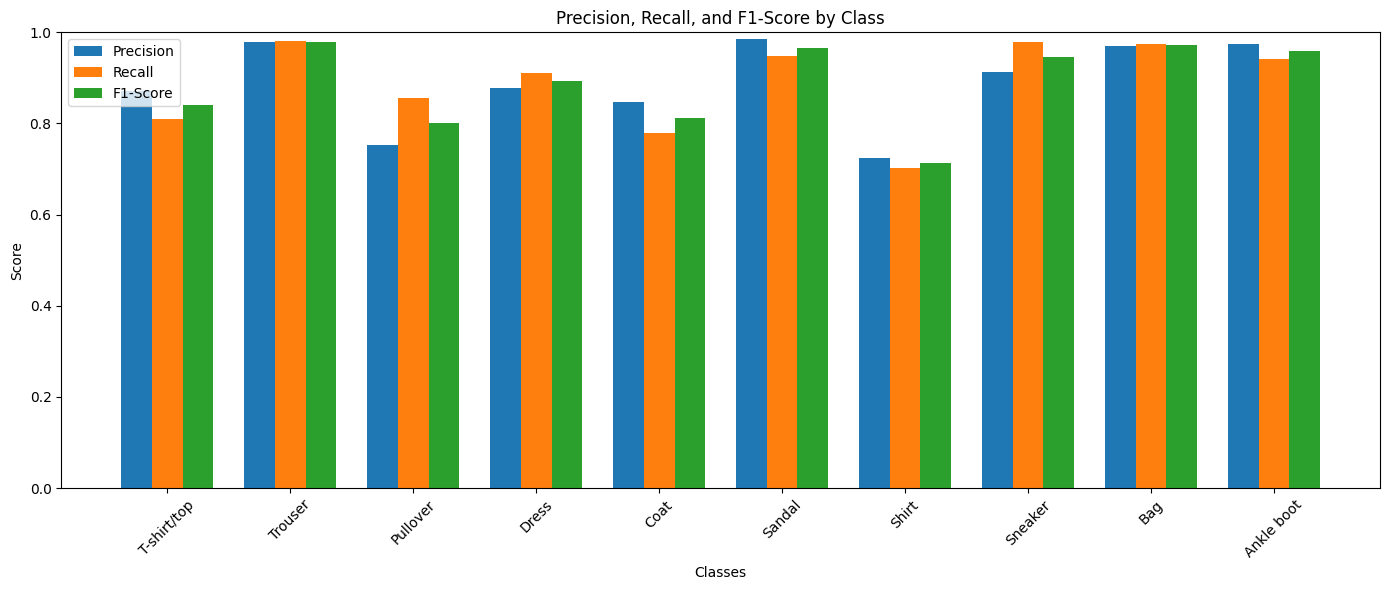

In [206]:
def plot_evaluation_metrics(y_true, y_pred, class_names):
    """
    Plots the confusion matrix and bar plots for precision, recall, and F1-score.

    Parameters:
    y_true (array): True labels.
    y_pred (array): Predicted labels.
    class_names (list): List of class names corresponding to the labels.
    """
    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

    # Extract metrics for each class
    precision = [report[cls]["precision"] for cls in class_names]
    recall = [report[cls]["recall"] for cls in class_names]
    f1_score = [report[cls]["f1-score"] for cls in class_names]

    # Plot Precision, Recall, and F1-Score
    x = np.arange(len(class_names))
    width = 0.25

    plt.figure(figsize=(14, 6))

    # Precision bar
    plt.bar(x - width, precision, width, label='Precision')
    # Recall bar
    plt.bar(x, recall, width, label='Recall')
    # F1-score bar
    plt.bar(x + width, f1_score, width, label='F1-Score')

    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.title('Precision, Recall, and F1-Score by Class')
    plt.xticks(x, class_names, rotation=45)
    plt.ylim([0, 1])
    plt.legend()

    plt.tight_layout()
    plt.show()

y_pred = np.argmax(model.predict(x_test), axis= 1)
plot_evaluation_metrics(y_test, y_pred, class_names)